# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [24]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 176MB/s]


Начнем с необходимых приготовлений.

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [26]:
coins = pd.DataFrame(pd.read_csv('coins.csv', index_col=['date']))

Посмотрим что получилось

In [27]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [28]:
len(coins['name'].unique())

70

### 2. За какой период данные мы имеем? (0.4 балла)

In [29]:
print(f"From {coins.index.min()} to {coins.index.max()}.")

From 2013-04-28 to 2018-06-06.


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [30]:
coins.isnull().sum()
print("Gaps are connected with information about coin transfer (colums with count, volume and adresses). Maybe information was lost.")

Gaps are connected with information about coin transfer (colums with count, volume and adresses). Maybe information was lost.


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [31]:
coin = coins[coins['high'].isin([coins['high'].max()])]

print(f"Highest price had {coin['name'].iloc[0]} on {coin.index[0]}")

Highest price had Bitcoin on 2017-12-17


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Maximum of capitalization was Bitcoin
Minimum of capitalization was KingN Coin


<Axes: ylabel='market'>

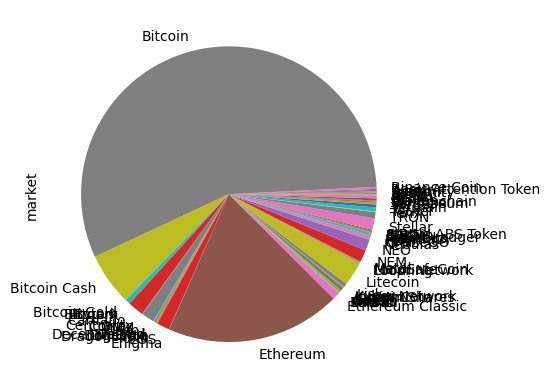

In [32]:
cap = coins.groupby('name')['market'].sum()

print(f"Maximum of capitalization was {cap.idxmax()}")
print(f"Minimum of capitalization was {cap.idxmin()}")

cap.plot(kind='pie')

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [33]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    data = coins.loc[(coins['symbol'] == symbol), ['open', 'close', 'high', 'low']].loc[start_date:end_date]

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    plt.title('Price change', fontsize=20)
    ax.set_ylabel('Price', size=20)
    ax.set_xlabel('Date', size=20)
    ax.plot(data.index, data.high, label='Max price')
    ax.plot(data.index, data.low, label='Min price')
    ax.plot(data.index, data.open, label='Price in the beginning')
    ax.plot(data.index, data.close, label='Price at the end')

    ax.set_xticks(data.index.values[::data.shape[0] // 10])

    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

Посмотрим, что получилось:

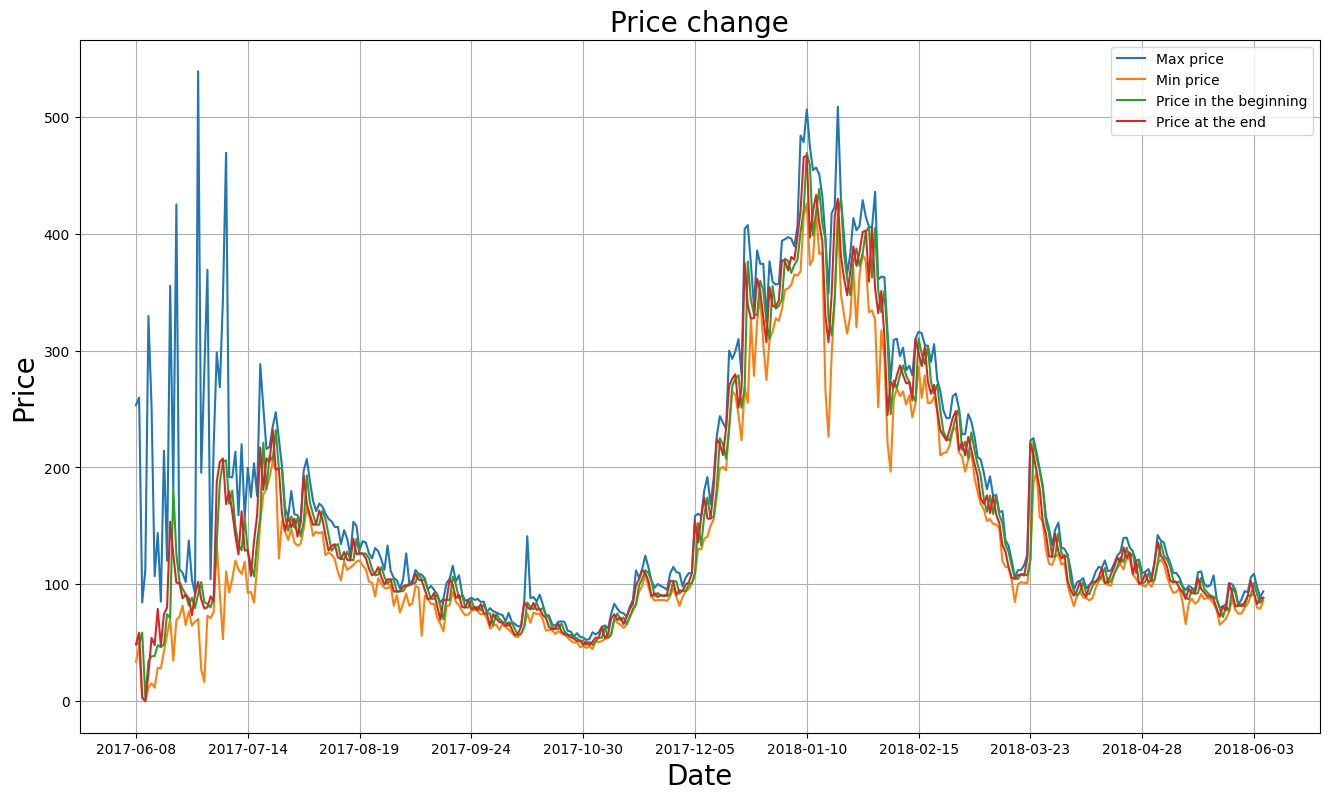

In [34]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [35]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    table = coins[coins['symbol'] == symbol][start_date:end_date].loc[start_date:end_date]

    max_price = table[['open', 'close']].max(axis=1)
    pnd = table.high / max_price
    return pnd.idxmax(), pnd.max()

In [36]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

Сравните эти значения для разных монет:

In [37]:
for coin in set(coins.symbol):
    result = find_most_severe_pump_and_dump(coins, symbol=coin, start_date='2017-06-01', end_date='2018-06-01')

    if result[1] < 2:
        print(f"{result[0]} pnd was {result[1]}. I think no one did pump and dump for {coin}.")
    else:
        print(f"{result[0]} pnd was {result[1]}. I think someone did pump and dump for {coin}.")

2018-03-14 pnd was 1.5265126623868979. I think no one did pump and dump for LOOM.
2017-12-17 pnd was 1.359942799461642. I think no one did pump and dump for DGB.
2017-12-27 pnd was 1.2713567839195978. I think no one did pump and dump for VEN.
2017-07-06 pnd was 1.3514021619927934. I think no one did pump and dump for PAY.
2017-09-19 pnd was 1.8519240136385777. I think no one did pump and dump for KNC.
2017-10-25 pnd was 1.3243755975664018. I think no one did pump and dump for KCS.
2018-03-05 pnd was 1.4631857737419598. I think no one did pump and dump for ZIL.
2017-10-08 pnd was 5.075208458226606. I think someone did pump and dump for RHOC.
2017-09-23 pnd was 4.528409090909091. I think someone did pump and dump for LRC.
2017-12-25 pnd was 1.726167450721039. I think no one did pump and dump for CVC.
2018-02-21 pnd was 5.777033492822967. I think someone did pump and dump for BTG.
2017-09-16 pnd was 9.651010376843255. I think someone did pump and dump for TRX.
2017-06-03 pnd was 1.2543352

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [38]:
def compute_roi(coins, investments, start_date, end_date):
    #price = coins[['symbol', 'price']]
    start_price = sum(investments.values())

    start_day = coins.loc[start_date:start_date]
    coins_count = {}

    for coin in investments:
        coins_count[coin] = investments[coin] / start_day['price'][start_day['symbol'] == coin][0]

    end_day = coins.loc[end_date:end_date]
    end_cost = 0

    for coin_symbol in investments:
        end_cost += end_day['price'][end_day['symbol'] == coin_symbol][0] * coins_count[coin_symbol]

    return (end_cost - start_price) / start_price

In [39]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614

In [40]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [41]:
def plot_bollinger_bands(coins, symbol, window, width):
    mid = coins.loc[coins.symbol == symbol, ['price']].rolling(window=window).mean()
    k = coins.loc[coins.symbol == symbol, ['price']].rolling(window=window).std()
    bound_low = mid - k * width
    bound_up = mid + k * width

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Date', size=20)
    ax.set_ylabel('Price', size=20)
    plt.title('Task 5. Technical analyses', fontsize=20)

    ax.plot(mid.index, mid, label='Middle value')
    ax.plot(coins.loc[coins.symbol == symbol, ['price']].index, coins.loc[coins.symbol == symbol, ['price']], label='Price')
    ax.plot(bound_low.index, bound_low, label='Lower bound')
    ax.plot(bound_up.index, bound_up, label='Upper bound')

    ax.set_xticks(coins.loc[coins.symbol == symbol, ['price']].index.values[::coins.loc[coins.symbol == symbol, ['price']].shape[0] // 10])
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


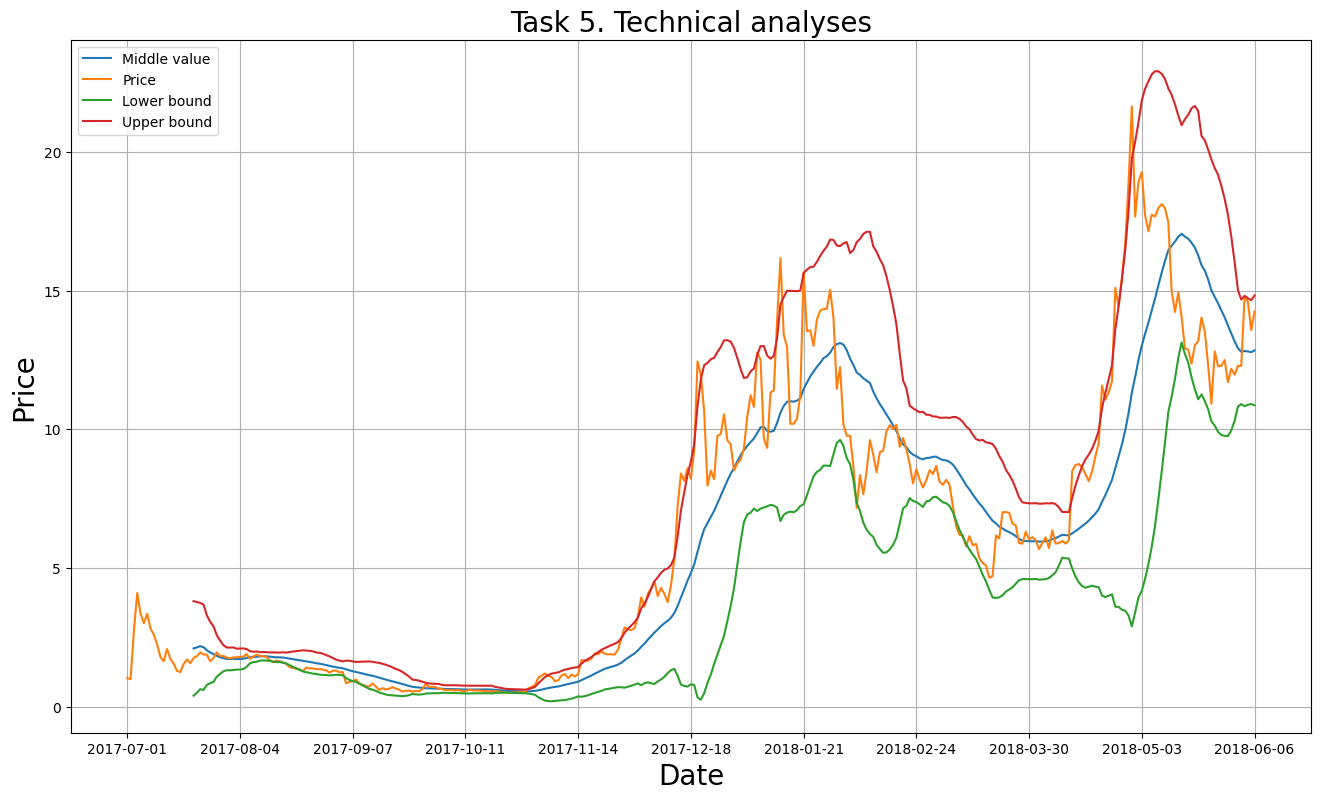

In [42]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

Я считаю, что правило Боллинджера выполнено, так как практически весь график заключен между границами, есть не более 10 выбивающихся точек.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [43]:
def plot_coins_capitalizations(coins, symbols, start_date):
    fig = plt.figure(figsize=(16, 7))
    ax = fig.add_subplot(111)
    ax.set_ylabel('Capitalization', size=20)
    ax.set_xlabel('Date', size=20)
    plt.title('Task 6. Capitalization as indicator', fontsize=20)

    for coin in symbols:
        cap_coin = coins.loc[coins.symbol == coin, ['market']].loc[start_date:]
        ax.plot(cap_coin.index, cap_coin, label=coin)

    ax.set_xticks(cap_coin.index.values[::cap_coin.shape[0] // 10])
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    cap_sum = coins.groupby(coins.index)['market'].sum().loc[start_date:]
    frame_sum = pd.DataFrame(data=cap_sum.values, columns=['market'], index=cap_sum.index)

    fig = plt.figure(figsize=(16, 7))
    ax = fig.add_subplot(111)
    ax.set_xlabel('Date', size=20)
    ax.set_ylabel('Share of capitalisation', size=20)
    plt.title('Task 6. Share of capitalisation', fontsize=20)

    for coin in symbols:
        cap_coin = coins.loc[coins.symbol == coin, ['market']].loc[start_date:] / frame_sum
        ax.plot(cap_coin.index, cap_coin, label=coin)

    ax.set_xticks(frame_sum.index.values[::frame_sum.shape[0] // 10])
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

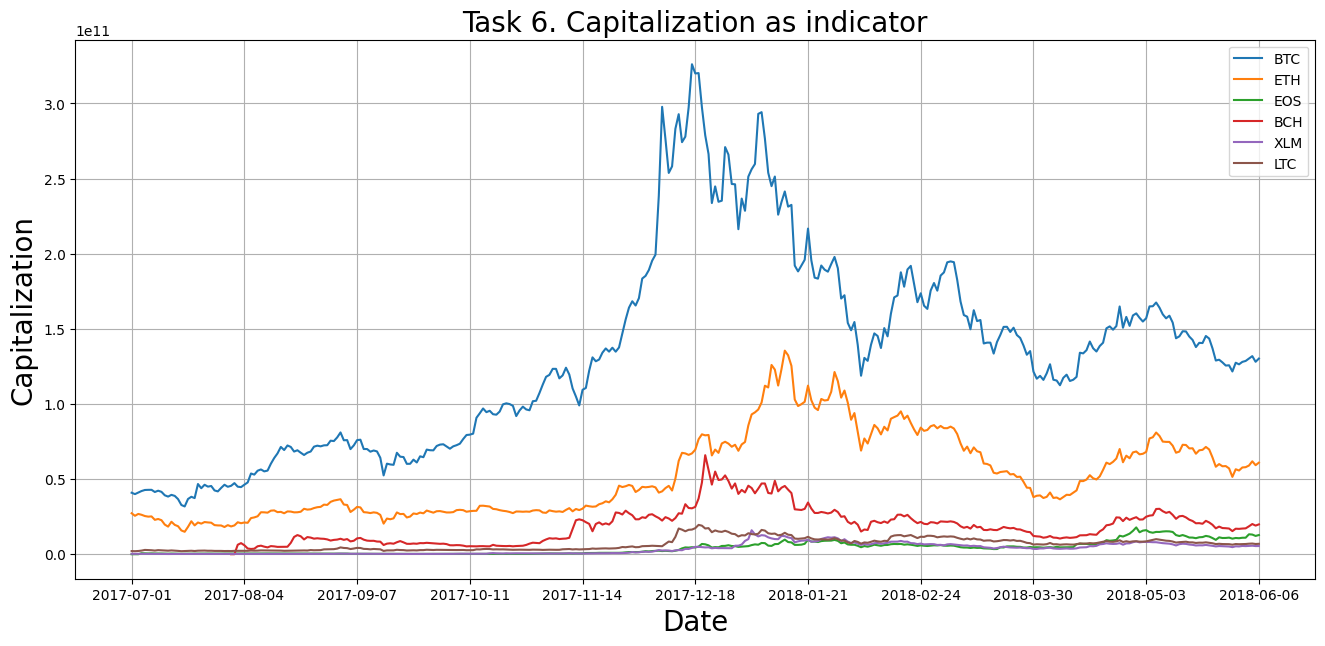

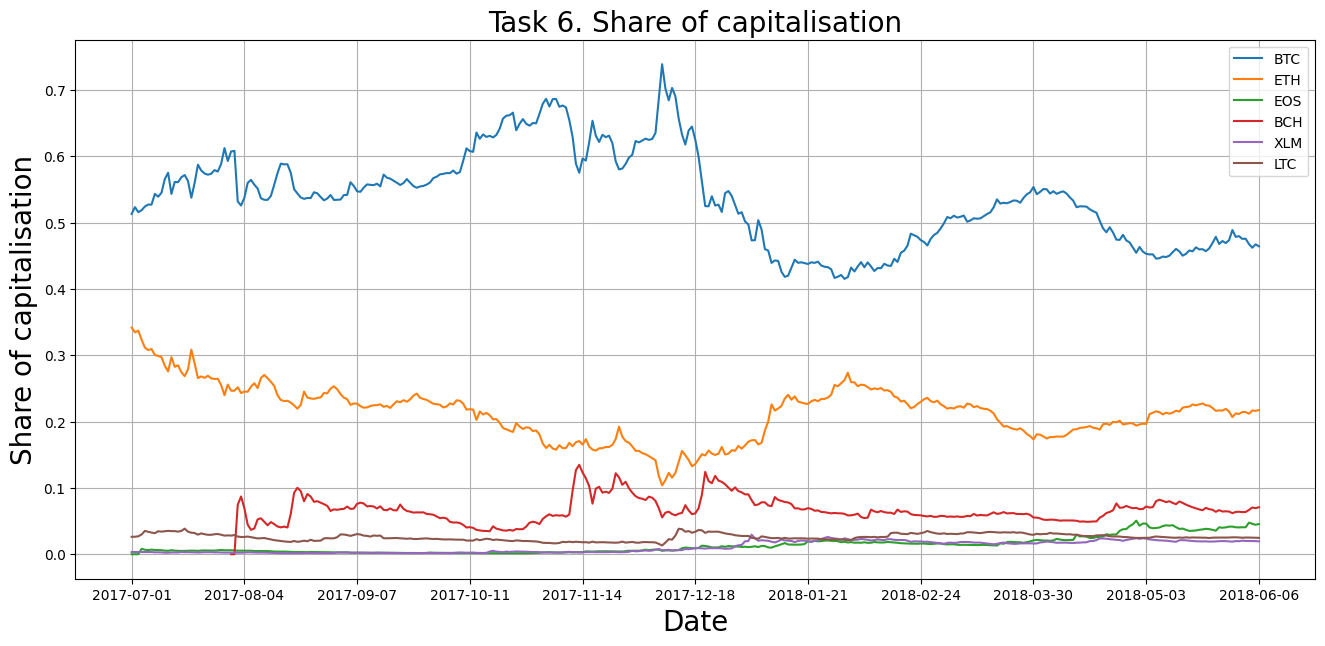

In [44]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Складывается впечатление, что рост капитализации биткоина соотвествует падению капитализации других монет и наоборот. Я думаю, что это связано с высокой долей конкуренции на рынке и с тем, что когда одна валюта теряет в стоимости, другая приобретает.

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

Довольно интересно ещё взглянуть на 2017-12-27:

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.